# Importing Libs

In [2]:
import numpy as np
import pandas as pd

# Creating Dataset

In [5]:
df = pd.read_csv('/Users/harmansingh/AI Engineering/Deep Learning/Self Organising Map (SOM)/Credit_Card_Applications.csv')
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


# SOM Unsupervised Learning

In [8]:
x= df.iloc[:,:-1].values
y=df.iloc[:,-1].values

## Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x = sc.fit_transform(x)

## Training SOM

In [14]:
from minisom import MiniSom

In [16]:
som = MiniSom( x=10,y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

## Vizualising Result

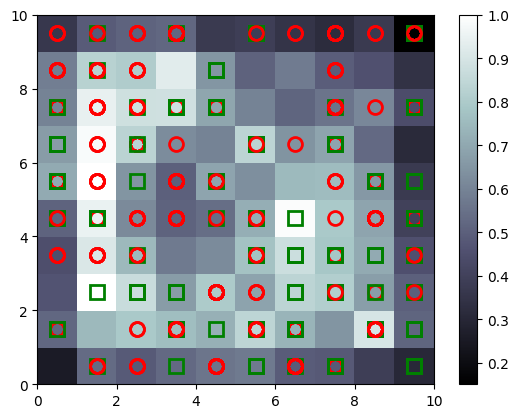

In [19]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,z in enumerate(x):
    w= som.winner(z)
    plot( w[0] + 0.5,
          w[1] +0.5,
          markers[y[i]],
          markeredgecolor= colors[y[i]],
          markerfacecolor='None',
          markersize=10,
          markeredgewidth=2)

show()

## Finding Frauds

In [22]:
mappings= som.win_map(x)
frauds= np.concatenate( (mappings[(7,7)], mappings[(7,8)] ), axis=0)
frauds = sc.inverse_transform(frauds)


In [24]:
np.set_printoptions(suppress=True, precision=8)
print(frauds)

[[15739548.           0.          22.67         7.           2.
         8.           4.           0.165        0.           0.
         0.           0.           2.         160.           1.   ]
 [15699839.           0.          28.17         0.585        2.
         6.           4.           0.04         0.           0.
         0.           0.           2.         260.        1005.   ]
 [15705918.           0.          37.33         2.5          2.
         3.           8.           0.21         0.           0.
         0.           0.           2.         260.         247.   ]
 [15783883.           0.          38.92         1.665        2.
         6.           4.           0.25         0.           0.
         0.           0.           2.           0.         391.   ]
 [15756538.           0.          39.08         4.           2.
         8.           4.           3.           0.           0.
         0.           0.           2.         480.           1.   ]
 [15728523.         

# ANN Going from Unsupervised to Supervised Deep Learning

In [27]:
customers = df.iloc[:,1:].values

In [29]:
# Creating Dependent Variable
is_fraud = np.zeros(len(df))
for i in range(len(df)):
    if df.iloc[i,0] in frauds:
        is_fraud[i]=1

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers= sc.fit_transform(customers)

In [34]:
# libs
from keras.models import Sequential
from keras.layers import Dense

In [36]:
# Initializing ANN
ann = Sequential()


2025-12-16 08:34:28.880751: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-12-16 08:34:28.881586: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-16 08:34:28.881655: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-12-16 08:34:28.882624: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-16 08:34:28.882689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [38]:
# Adding Input Layer
ann.add( Dense(2, kernel_initializer='uniform',activation='relu', input_dim= 15) )

In [40]:
# Adding Output Layer
ann.add(Dense(16, activation='relu'))
ann.add(Dense(8, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

In [42]:
# compiling ANN
ann.compile( optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'] )

In [44]:
# Fitting
ann.fit( customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2


2025-12-16 08:34:32.606784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-12-16 08:34:32.679158: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


690/690 [==============================] - 6s 4ms/step - loss: 0.2626 - accuracy: 0.9565
Epoch 2/2
690/690 [==============================] - 3s 4ms/step - loss: 0.1440 - accuracy: 0.9667


# Predicting Probabilities

In [47]:
y_pred= ann.predict(customers)


2025-12-16 08:34:46.117328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 9ms/step


In [49]:
y_pred.shape

(690, 1)

In [51]:
y_pred= np.concatenate( ( df.iloc[:,0:1].values, y_pred) , axis=1)
y_pred.shape


(690, 2)

In [53]:
y_pred= y_pred[y_pred[:,1].argsort()]
y_pred.shape


(690, 2)

In [55]:
np.set_printoptions(suppress=True, precision=8)
print(y_pred)

[[15790113.                0.00836959]
 [15762716.                0.01092376]
 [15621423.                0.01344538]
 ...
 [15675926.                0.03550955]
 [15710138.                0.03553488]
 [15627328.                0.03719971]]
